## Retrieving 500+ cities and weather using JSON 

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# nearest city for each lat & long
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # if first time seeing city, add to city list
    if city not in cities:
        cities.append(city)
# print list length to confirm sufficient count
len(cities)

604

In [6]:
# Import the requests library & datetime module
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call, specifying imperial = Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# create empty city list to hold weather data
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all cities in our list
# enumerate is similar to a for loop but for a dictionary 
# enumerate adds a counter as a key and lets you add an object as the value
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint url for each city & concatenate city name by removing blank spaces
    city_url = url +"&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        # not good practice to use 'pass': typically want to do something specific
          
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | iacu
Processing Record 4 of Set 1 | guinticgan
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | nicoya
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | berdigestyakh
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | tilichiki
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | vila franca do campo
Processing Recor

Processing Record 39 of Set 4 | singaparna
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | qasigiannguit
Processing Record 45 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 46 of Set 4 | clinton
Processing Record 47 of Set 4 | gazojak
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | artyom
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | blumberg
Processing Record 2 of Set 5 | lyuban
Processing Record 3 of Set 5 | moree
Processing Record 4 of Set 5 | galesong
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | pokhara
Processing Record 7 of Set 5 | baruun-urt
Processing Record 8 of Set 5 | eregli
Processing Record 9 of Set 5 | kimbe
Processing Record 10 of Set 5 | huntington
Pro

Processing Record 27 of Set 8 | bo
City not found. Skipping...
Processing Record 28 of Set 8 | chase
Processing Record 29 of Set 8 | banjar
Processing Record 30 of Set 8 | gayeri
Processing Record 31 of Set 8 | teahupoo
Processing Record 32 of Set 8 | zhezkazgan
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | tame
Processing Record 36 of Set 8 | ankpa
Processing Record 37 of Set 8 | tessalit
Processing Record 38 of Set 8 | nizhniy tsasuchey
Processing Record 39 of Set 8 | cuenca
Processing Record 40 of Set 8 | tlaxiaco
City not found. Skipping...
Processing Record 41 of Set 8 | mahebourg
Processing Record 42 of Set 8 | acuna
City not found. Skipping...
Processing Record 43 of Set 8 | adrar
Processing Record 44 of Set 8 | sao joao da barra
Processing Record 45 of Set 8 | kaohsiung
Processing Record 46 of Set 8 | merauke
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | qujing
Processing Record 49

Processing Record 11 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 12 | naranjal
Processing Record 13 of Set 12 | tucupita
Processing Record 14 of Set 12 | antalaha
Processing Record 15 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 16 of Set 12 | belmonte
Processing Record 17 of Set 12 | gurgan
City not found. Skipping...
Processing Record 18 of Set 12 | zmeinogorsk
Processing Record 19 of Set 12 | balaka
Processing Record 20 of Set 12 | moussoro
Processing Record 21 of Set 12 | matara
Processing Record 22 of Set 12 | huangnihe
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | gazanjyk
Processing Record 25 of Set 12 | charters towers
Processing Record 26 of Set 12 | lompoc
Processing Record 27 of Set 12 | letpadan
Processing Record 28 of Set 12 | fernandina beach
Processing Record 29 of Set 12 | escuintla
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | 

In [9]:
len(city_data)

551

In [10]:
# convert array of dictionaries to pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.86,72,17,6.93,PF,2022-03-28 18:49:53
1,Barrow,71.2906,-156.7887,-2.18,71,0,19.57,US,2022-03-28 18:50:28
2,Iacu,-12.7672,-40.2117,86.76,48,100,11.65,BR,2022-03-28 18:54:26
3,Guinticgan,11.5641,123.1236,81.05,81,100,15.97,PH,2022-03-28 18:54:26
4,Punta Arenas,-53.1500,-70.9167,48.22,81,100,6.91,CL,2022-03-28 18:52:24
5,Tuatapere,-46.1333,167.6833,56.07,94,97,1.99,NZ,2022-03-28 18:52:11
6,Nicoya,10.1483,-85.4520,97.18,27,98,9.17,CR,2022-03-28 18:54:26
7,Hilo,19.7297,-155.0900,76.62,76,62,5.99,US,2022-03-28 18:54:27
8,Kirakira,-10.4544,161.9205,79.77,86,99,4.83,SB,2022-03-28 18:54:27
9,Berdigestyakh,62.0989,126.6992,14.79,96,100,6.33,RU,2022-03-28 18:54:28


In [11]:
# change column order
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-28 18:49:53,-23.1203,-134.9692,77.86,72,17,6.93
1,Barrow,US,2022-03-28 18:50:28,71.2906,-156.7887,-2.18,71,0,19.57
2,Iacu,BR,2022-03-28 18:54:26,-12.7672,-40.2117,86.76,48,100,11.65
3,Guinticgan,PH,2022-03-28 18:54:26,11.5641,123.1236,81.05,81,100,15.97
4,Punta Arenas,CL,2022-03-28 18:52:24,-53.1500,-70.9167,48.22,81,100,6.91


In [12]:
# create csv output file
output_data = "weather_data/cities.csv"
# export data into csv
city_data_df.to_csv(output_data, index_label="City_ID")

## Plotting Weather

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# closed original kernel | reading from csv rather than re-running JSON request above
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2022-03-28 18:49:53,-23.1203,-134.9692,77.86,72,17,6.93
1,1,Barrow,US,2022-03-28 18:50:28,71.2906,-156.7887,-2.18,71,0,19.57
2,2,Iacu,BR,2022-03-28 18:54:26,-12.7672,-40.2117,86.76,48,100,11.65
3,3,Guinticgan,PH,2022-03-28 18:54:26,11.5641,123.1236,81.05,81,100,15.97
4,4,Punta Arenas,CL,2022-03-28 18:52:24,-53.1500,-70.9167,48.22,81,100,6.91


In [3]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

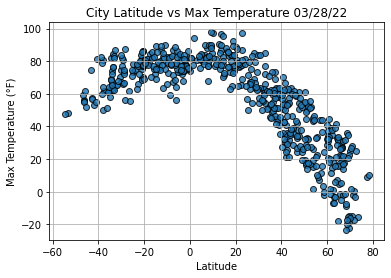

In [6]:
# import time module
import time

# build scatterplot for latitude and max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker="o", alpha=0.8, label="Cities")

# add graph properties
plt.title(f"City Latitude vs Max Temperature " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# save figure & show
plt.savefig("weather_data/Fig1.png")
plt.show()

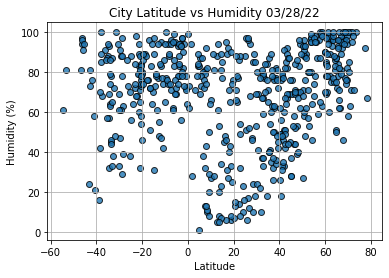

In [7]:
# build scatterplot for latitude and humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker="o", alpha=0.8, label="Cities")

# add graph properties
plt.title(f"City Latitude vs Humidity " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save figure & show
plt.savefig("weather_data/Fig2.png")
plt.show()

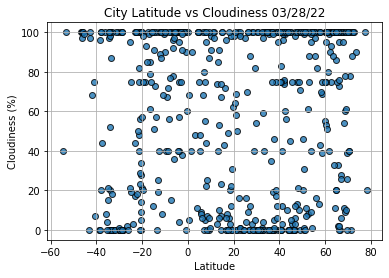

In [8]:
# build scatterplot for latitude and cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker="o", alpha=0.8, label="Cities")

# add graph properties
plt.title(f"City Latitude vs Cloudiness " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save figure & show
plt.savefig("weather_data/Fig3.png")
plt.show()

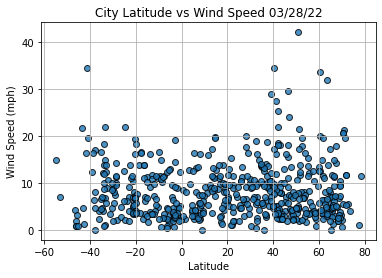

In [9]:
# build scatterplot for latitude and wind_speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker="o", alpha=0.8)

# add graph properties
plt.title(f"City Latitude vs Wind Speed " +time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# save figure & show
plt.savefig("weather_data/Fig4.png")
plt.show()

## Linear Regression

In [25]:
# Import linregress
from scipy.stats import linregress
# Create a function to perform linear regression on the weather data and plot a regression line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = slope * x_values + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {r_value:.5f}")

In [9]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

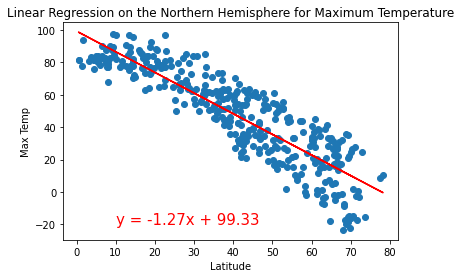

The r-value is: -0.88536


In [26]:
# Linear regression on the Northern Hemisphere - max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,-20))

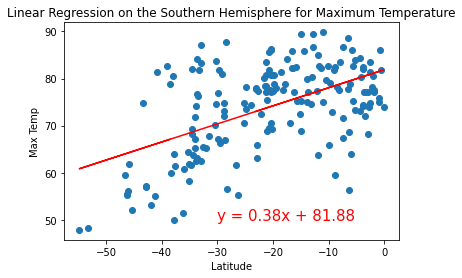

The r-value is: 0.53650


In [27]:
# Linear regression on the Southern Hemisphere - max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-30,50))

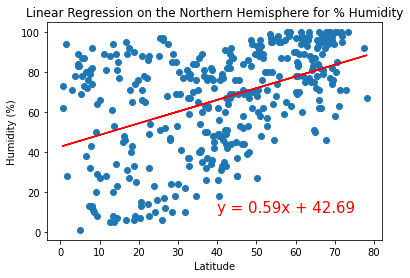

The r-value is: 0.44872


In [29]:
# Linear regression on the Northern Hemisphere - humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       'Humidity (%)',(40,10))

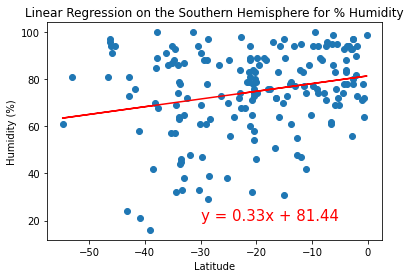

The r-value is: 0.23518


In [31]:
# Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       'Humidity (%)',(-30,20))

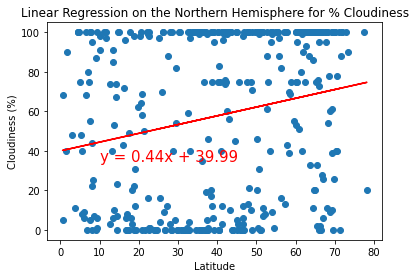

The r-value is: 0.21287


In [33]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       'Cloudiness (%)',(10,35))

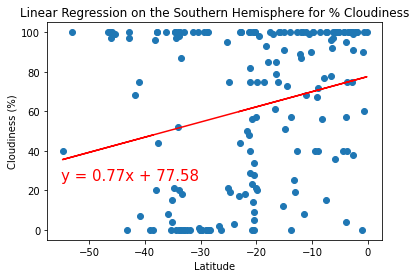

The r-value is: 0.25122


In [35]:
# Linear regression on the Southern Hemisphere - cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       'Cloudiness (%)',(-55,25))

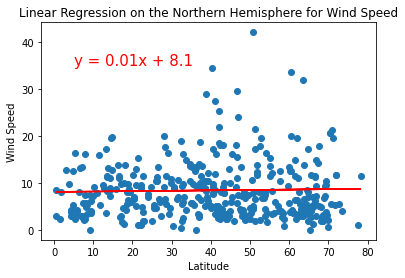

The r-value is: 0.02708


In [37]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(5,35))

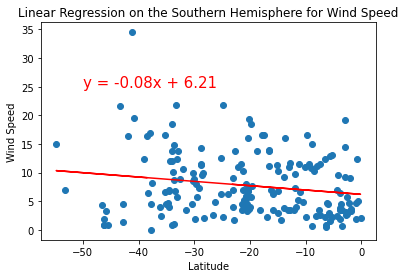

The r-value is: -0.18094


In [39]:
# Linear regression on the Southern Hemisphere - wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,25))